In [1]:
#Weslley Lioba Caldas

# Stochastic Gradient Descendent

## importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from scipy import stats

## importando os dados

In [14]:
df=pd.read_csv('ex1data2.txt',sep=' ',header=None)
df.columns=['x1','x2','y']
#Adcionando o intercept
df.insert(loc=0, column='x0', value=1)

## Apresentando os dados

In [16]:
df.head()

,x0,x1,x2,y
0,1,2.104,3,3.999
1,1,1.600,3,3.299
2,1,2.400,3,3.690
3,1,1.416,2,2.320
4,1,3.000,4,5.399


## Definindo os parâmetros

In [31]:
#definindo os parâmetros
alfa= 0.01;
epocas=100;
#pesos aleatórios menores que zero
w=np.random.randn(1, 3)[0]/100

## Distribuição dos dados

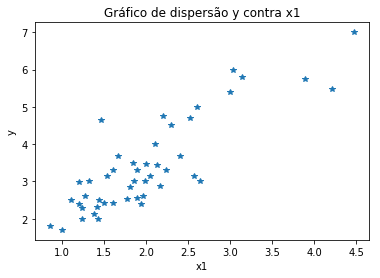

In [32]:
plt.plot(df.x1,df.y,'*')
plt.title('Gráfico de dispersão y contra x1')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

## SGD

In [33]:
#transformando de pandas para numpy array
data=df.values
#lista contendo o erro quadrático médio por época
eqm=[]
for i in range(epocas):
    #embaralha os dados
    np.random.shuffle(data)
    sum_eqm=0
    for instance in data:
        #as duas primeiras linhas são o input(uma variável e o intercept)
        x=instance[0:3]
        # a ultima linha é o output esperardo
        y=instance[3]
        y_h=np.matmul(w,x)
        erro=y-y_h
        sum_eqm=sum_eqm+(erro*erro)
        w = w + alfa*erro*x
    eqm.append(sum_eqm/len(data))

### Plot do Erro Quadrático Médio

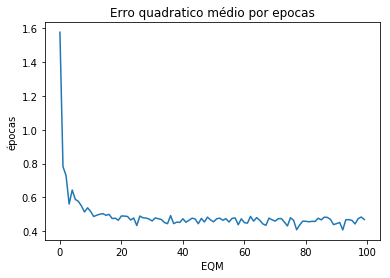

In [34]:
plt.plot(eqm)
plt.title('Erro quadratico médio por epocas')
plt.xlabel('EQM')
plt.ylabel('épocas')
plt.show()
#Na medida que as épocas passam o EQM diminui, o que indica o aprendizago

## Least Squares

In [117]:
#w_m=pinv(x'*x)*x'*y
data=df.values
x=data[:,0:3]
y=data[:,3]
w_ls=np.matmul(np.matmul(np.linalg.pinv(np.matmul(x.T,x)),x.T),y)

### Comparando coeficiente de pesos

#### SGD

In [121]:
w

array([ 0.80527139,  1.39267662, -0.05561647])

#### Least Squares

In [122]:
w_ls

array([ 0.8959791 ,  1.39210674, -0.08738019])

Os coeficientes não são exatamente iguais apesar de serem bem paracidos. Diferentemente do método dos Mínimos Quadrados(Least Squares) que encontra os coeficientes da regressão linear em uma única etapa, o Algoritmo do Gradiente Descendente Stocastico(Stochastic Gradient Descendent) apresentará resultados diferentes sempre que for executado, uma vez que utiliza aleatóriamente porções dos exemplos de treino. 

### SGD vs Least Squares

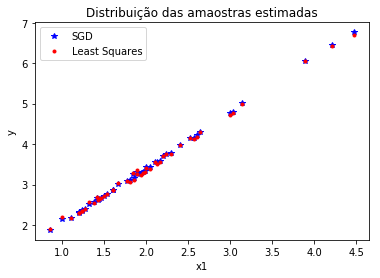

In [151]:
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(df.x1,np.matmul(df[['x0','x1','x2']].values,w),'b*',label='SGD')
plt.plot(df.x1,np.matmul(df[['x0','x1','x2']].values,w_ls),'r.',label='Least Squares')
plt.title('Distribuição das amaostras estimadas')
plt.xlabel('x1')
plt.ylabel('y')
ax.legend()
plt.show()